# Лабораторная работа 1. Бинарная классификация фрагментов речи с использованием мел-кепстральных коэффициентов

В этой лабораторной работе мы научимся решать задачу классификации аудиоданных. Для извлечения признаков будем использовать мел-кепстральные коэффициенты.

Данные: https://drive.google.com/file/d/1ZiZxAN_edCpo-TsSqyCMugbvF9-s4odw/view?usp=share_link

## Импорты

In [125]:
# librosa - библиотека для анализа аудиоданных
import librosa
import librosa.display

# импортируем зависимости для возможности проигрывания аудио в ноутбуке
from IPython.display import Audio

import pandas as pd
import numpy as np

## Загрузка данных

In [126]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/MyDrive/Colab Notebooks/ASR/

import os
data_dir = 'speech-classify-data'
files = os.listdir(data_dir)
data = []
for file in files:
    parts = file.split('_')
    data.append({
        "filename": f'speech-classify-data/{file}',
        "emotion": parts[0],
        "gender": parts[1],
    })

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/ASR


In [127]:
data = pd.DataFrame(data)
data

,filename,emotion,gender
0,speech-classify-data/angry_female_14.wav,angry,female
1,speech-classify-data/angry_female_16.wav,angry,female
2,speech-classify-data/angry_female_1.wav,angry,female
3,speech-classify-data/angry_female_13.wav,angry,female
4,speech-classify-data/angry_female_2.wav,angry,female
...,...,...,...
215,speech-classify-data/stressful_male_191.wav,stressful,male
216,speech-classify-data/stressful_male_205.wav,stressful,male
217,speech-classify-data/stressful_male_202.wav,stressful,male
218,speech-classify-data/stressful_male_204.wav,stressful,male


## Проигрываем аудио в ноутбуке

In [128]:
sample = data['filename'][0]
audio_data, sample_rate = librosa.load(sample)
sample_rate

22050

In [129]:
Audio(data['filename'][0])

Можем также посмотреть на форму волны для этого файла.

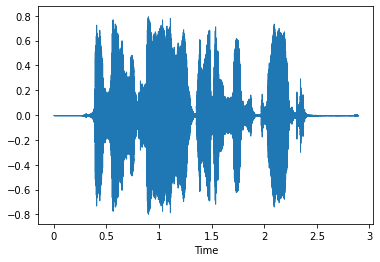

In [130]:
librosa.display.waveshow(y=audio_data, sr=sample_rate);

## Извлечение признаков из данных (мел-кепстральные коэффициенты)

Получаем множества мел-кепстральных коэффициентов (https://habr.com/ru/post/140828/)

In [131]:
librosa.feature.mfcc(y=audio_data, n_mfcc=12, sr=sample_rate)

array([[-491.07114  , -491.07114  , -491.07114  , ..., -482.7648   ,
        -479.90335  , -479.41217  ],
       [   0.       ,    0.       ,    0.       , ...,   11.703035 ,
          15.745678 ,   16.446575 ],
       [   0.       ,    0.       ,    0.       , ...,   11.572128 ,
          15.602697 ,   16.321949 ],
       ...,
       [   0.       ,    0.       ,    0.       , ...,    8.605297 ,
          12.350446 ,   13.396328 ],
       [   0.       ,    0.       ,    0.       , ...,    7.9805346,
          11.661647 ,   12.750163 ],
       [   0.       ,    0.       ,    0.       , ...,    7.3347635,
          10.947615 ,   12.068209 ]], dtype=float32)

Возьмем среднее значение в каждом множестве - полученные 12 чисел характеризуют аудиосигнал.

In [132]:
sample_data = np.mean(librosa.feature.mfcc(y=audio_data, n_mfcc=12, sr=sample_rate), axis=1)

In [133]:
sample_data

array([-308.7502    ,   80.1754    ,  -16.067514  ,   14.567691  ,
          9.652142  ,  -15.274674  ,  -10.788048  ,    0.87400776,
        -13.961583  ,  -10.814205  ,   -2.7489977 ,   -1.5957618 ],
      dtype=float32)

Теперь вы можете сформировать датасет и решить задачу классификации.

Вы можете сами выбирать подходящее количество множеств коэффициентов.

## Задание

1. Сформируйте датасет (использовать мел-кепстральные коэффициенты для каждого аудиофайла).
2. Решите задачу бинарной классификации (определите пол говорящего) с помощью трех различных моделей (одна из них должна быть нейронной сетью с прямой связью). Оцените обученные модели (для этого придется предварительно разбить данные на обучающие и тестовые, а также использовать знакомые вам метрики классификации).
3. Будьте готовы к различным вопросам, касающимся кода, архитектуры сети и т. д.

### Task 1

In [134]:
sample_data = list()

for sample in data['filename']:
  audio_data, sample_rate = librosa.load(sample)
  sample_data.append(np.mean(librosa.feature.mfcc(y=audio_data, n_mfcc=12, sr=sample_rate), axis=1))
  
dataset = pd.DataFrame(sample_data)
dataset['emotion'] = data['emotion']
dataset['gender'] = data['gender']

dataset

,0,1,2,3,4,5,6,7,8,9,10,11,emotion,gender
0,-308.750214,80.175400,-16.067514,14.567691,9.652142,-15.274674,-10.788048,0.874008,-13.961583,-10.814205,-2.748998,-1.595762,angry,female
1,-339.592773,57.039585,-65.667191,39.777683,-5.187949,-51.922222,-21.551624,-7.845531,-20.083818,-16.467962,-5.804309,-13.699186,angry,female
2,-317.649109,74.313133,-10.191977,0.707142,-3.871180,-16.515993,-22.003031,-4.169624,-13.638633,-16.027605,-6.662505,-8.013873,angry,female
3,-327.714508,148.381821,-13.662951,27.161970,-6.720571,21.519142,14.889552,-6.956378,7.502478,-1.431361,-13.262218,-7.176463,angry,female
4,-462.096832,83.683052,-18.050482,12.791983,-15.182943,-1.470657,-20.394100,-7.770925,10.448700,-20.407206,-1.007338,-6.318524,angry,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,-204.781601,106.080994,-39.552628,39.443344,-6.987979,13.633149,-7.782823,1.140985,-21.506544,-6.935690,-10.578329,-20.174770,stressful,male
216,-208.786133,114.604126,-54.711411,38.392052,-3.283085,3.052191,-10.432646,6.635236,-25.039747,-5.522503,-9.108787,-18.332550,stressful,male
217,-278.344147,150.400513,-5.511689,9.070321,-26.995333,4.372656,-13.940016,-15.391689,-10.049695,-5.636138,-2.744603,-10.629896,stressful,male
218,-270.559204,135.622665,-5.516690,52.634190,-23.841766,8.159498,-16.481438,0.892839,0.251855,-18.023815,2.170515,-9.699046,stressful,male


### Task 2

In [135]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [136]:
gender = {
    "male" : 0,
    "female" : 1
}
dataset['gender'] = dataset['gender'].map(gender)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=['gender', 'emotion']), dataset['gender'], test_size=0.15, random_state=42, stratify=dataset['gender'])

In [154]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, activation='elu', input_shape=(12,)))
model.add(tf.keras.layers.Dropout(.2, input_shape=(2,)))
model.add(tf.keras.layers.Dense(8, activation='elu', input_shape=(8,)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [155]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [156]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
6/6 [==============================] - 2s 5ms/step - loss: 54.2458 - binary_accuracy: 0.5829 - false_negatives_11: 0.0000e+00
Epoch 2/250
6/6 [==============================] - 0s 5ms/step - loss: 56.2122 - binary_accuracy: 0.5829 - false_negatives_11: 0.0000e+00
Epoch 3/250
6/6 [==============================] - 0s 7ms/step - loss: 53.7770 - binary_accuracy: 0.5775 - false_negatives_11: 1.0000
Epoch 4/250
6/6 [==============================] - 0s 6ms/step - loss: 56.0075 - binary_accuracy: 0.5829 - false_negatives_11: 0.0000e+00
Epoch 5/250
6/6 [==============================] - 0s 6ms/step - loss: 54.3416 - binary_accuracy: 0.5829 - false_negatives_11: 0.0000e+00
Epoch 6/250
6/6 [==============================] - 0s 8ms/step - loss: 52.3646 - binary_accuracy: 0.5829 - false_negatives_11: 0.0000e+00
Epoch 7/250
6/6 [==============================] - 0s 6ms/step - loss: 54.7761 - binary_accuracy: 0.5829 - false_negatives_11: 0.0000e+00
Epoch 8/250
6/6 [=====================

In [157]:
y_pred = model.predict(X_test)
y_pred = list(map(lambda x: 1 if x>0.5 else 0, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 5ms/step
[[14  0]
 [ 6 13]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       1.00      0.68      0.81        19

    accuracy                           0.82        33
   macro avg       0.85      0.84      0.82        33
weighted avg       0.87      0.82      0.82        33



In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [143]:
parameters = {'n_neighbors':[3, 4, 5, 6, 7]}
knn = KNeighborsClassifier()

clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'n_neighbors': 7}

In [144]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  3]
 [ 1 18]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.86      0.95      0.90        19

    accuracy                           0.88        33
   macro avg       0.89      0.87      0.87        33
weighted avg       0.88      0.88      0.88        33



In [145]:
parameters = {'max_depth':range(1, 15)}
dtc = DecisionTreeClassifier()

clf = GridSearchCV(dtc, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'max_depth': 6}

In [146]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  2]
 [ 1 18]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.90      0.95      0.92        19

    accuracy                           0.91        33
   macro avg       0.91      0.90      0.91        33
weighted avg       0.91      0.91      0.91        33

